# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime




# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | pizarro
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | jaru
Processing Record 5 of Set 1 | sylt-ost
Processing Record 6 of Set 1 | kerikeri
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | pandan
Processing Record 11 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 1 | alice springs
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | mahanoro
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | ganshui
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | por

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,18.41,71,90,5.40,SH,1707406926
1,pizarro,4.9533,-77.3660,28.77,71,66,1.00,CO,1707406927
2,margaret river,-33.9500,115.0667,21.67,46,0,5.14,AU,1707406928
3,jaru,-10.4389,-62.4664,29.72,72,100,1.52,BR,1707406652
4,sylt-ost,54.8833,8.3500,3.05,81,100,1.54,DE,1707406929


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,18.41,71,90,5.40,SH,1707406926
1,pizarro,4.9533,-77.3660,28.77,71,66,1.00,CO,1707406927
2,margaret river,-33.9500,115.0667,21.67,46,0,5.14,AU,1707406928
3,jaru,-10.4389,-62.4664,29.72,72,100,1.52,BR,1707406652
4,sylt-ost,54.8833,8.3500,3.05,81,100,1.54,DE,1707406929


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

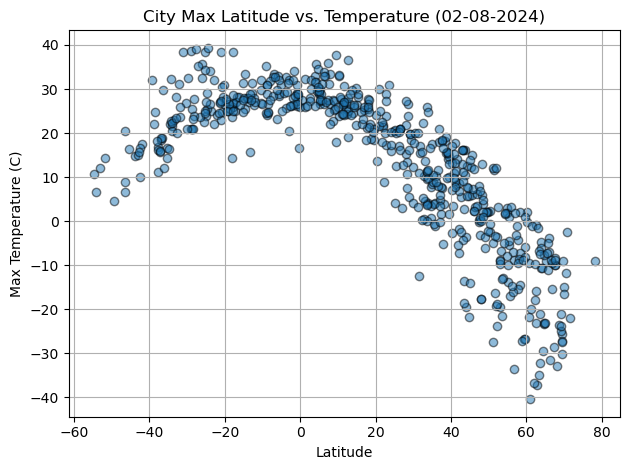

In [28]:

# # Build scatter plot for latitude vs. temperature
import datetime
import matplotlib.pyplot as plt


plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.5, edgecolors='black')

# Format date
date = datetime.datetime.now()
date_str = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.title(f"City Max Latitude vs. Temperature ({date_str})")  
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

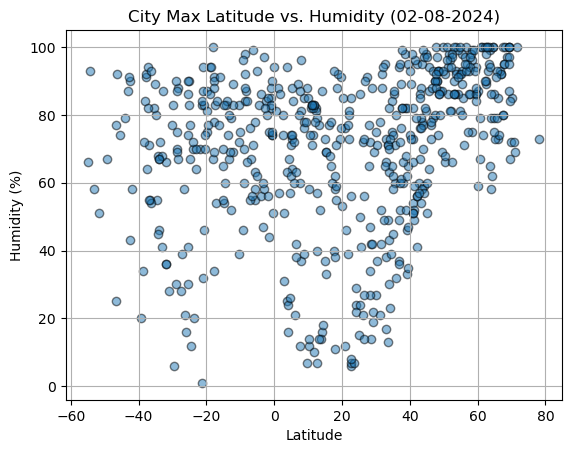

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({date_str})") 
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

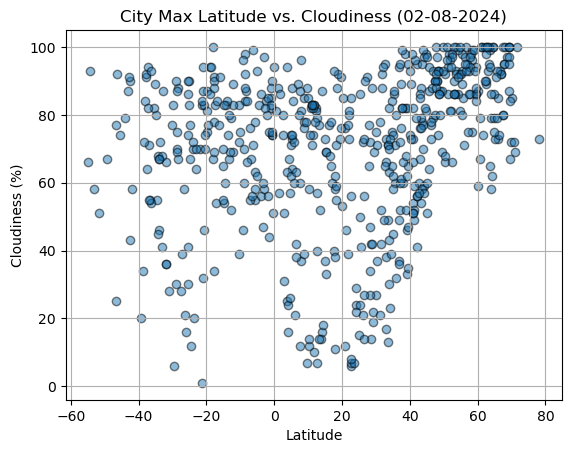

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df ['Lat'], city_data_df['Humidity'], alpha = 0.5, edgecolors ='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Max Latitude vs. Cloudiness ({date_str})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid("Ture")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

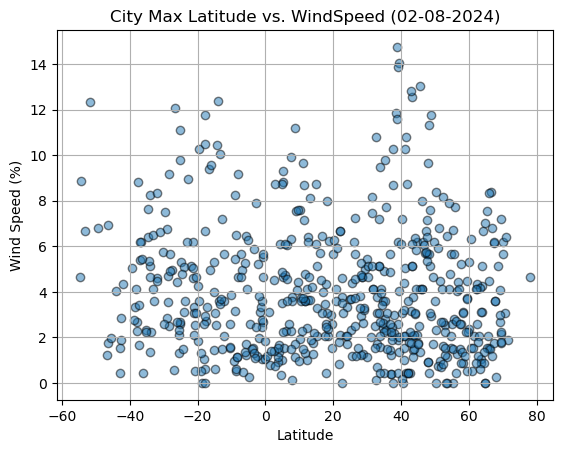

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. WindSpeed ({date_str})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, xlabel='', ylabel='', title=''):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.text(0.5, 0.9, line_eq, fontsize=12, ha='center', transform=plt.gca().transAxes, color='red')

    regress_values = x * slope + intercept
    
    # Plot scatter plot
    plt.scatter(x, y)

    # Plot regression line
    plt.plot(x, slope*x + intercept, color='red')

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # print the r value
    print(f'The r-value is: {r_value**2}')
    
    # Show plot
    plt.show()

# # Define a function to create Linear Regression plots
# def linear_regression_plot(x, y, xlabel='', ylabel='', title=''):
#     slope, intercept, r_value, p_value, std_err = linregress(x, y)
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.text(0.5, 0.9, line_eq, fontsize=12, ha='center', transform=plt.gca().transAxes, color='red')

#     regress_values = x * slope + intercept
#      # Plot scatter plot
#     plt.scatter(x, y)

#     # Plot regression line
#     plt.plot(x, slope*x + intercept, color='red')


#     # Add labels and title
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
    
#     # print the r value
#     print(f'The r-value is: {r_value**2}')
#     # Show plot
#     plt.show()


In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pizarro,4.9533,-77.3660,28.77,71,66,1.00,CO,1707406927
4,sylt-ost,54.8833,8.3500,3.05,81,100,1.54,DE,1707406929
6,qaqortoq,60.7167,-46.0333,-9.57,67,23,6.33,GL,1707406930
8,hawaiian paradise park,19.5933,-154.9731,18.35,91,0,2.57,US,1707406828
9,pandan,14.0453,124.1694,24.49,87,2,1.77,PH,1707406932


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,18.41,71,90,5.40,SH,1707406926
2,margaret river,-33.9500,115.0667,21.67,46,0,5.14,AU,1707406928
3,jaru,-10.4389,-62.4664,29.72,72,100,1.52,BR,1707406652
5,kerikeri,-35.2268,173.9474,16.62,89,49,2.31,NZ,1707406929
7,puerto ayora,-0.7393,-90.3518,28.98,90,90,2.68,EC,1707406931


###  Temperature vs. Latitude Linear Regression Plot

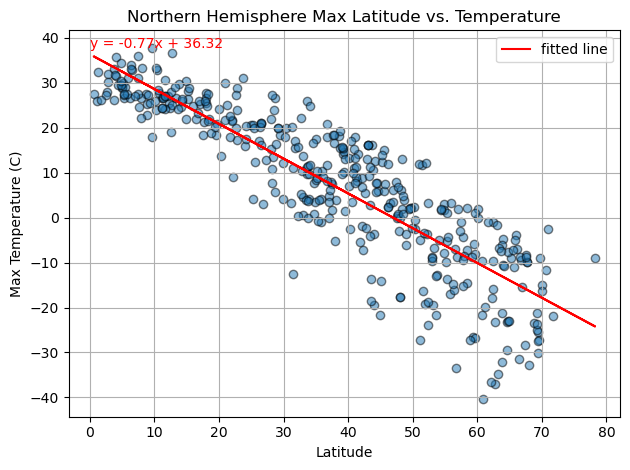

The r-value is: 0.7714470505916879


In [77]:
# Linear regression on Northern Hemisphere
#linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')
# Scatter plot for latitude vs. maximum temperature in the Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], alpha=0.5, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], intercept + slope * northern_hemi_df['Lat'], 'r', label='fitted line')

# Add the equation of the line to the plot
plt.text(0, northern_hemi_df['Max Temp'].max(), f'y = {slope:.2f}x + {intercept:.2f}', color='red')

plt.grid(True)
plt.title("Northern Hemisphere Max Latitude vs. Temperature")
plt.tight_layout()
plt.legend()

# Show plot
plt.show()

# Print the r-value
print(f'The r-value is: {r_value**2}')


The r-value is: 0.3391867781799962


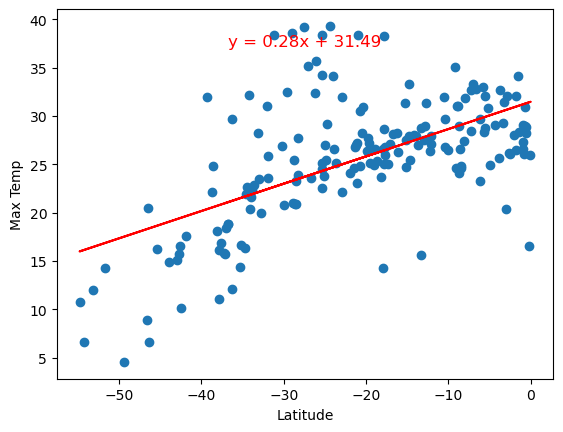

In [72]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2265449410689458


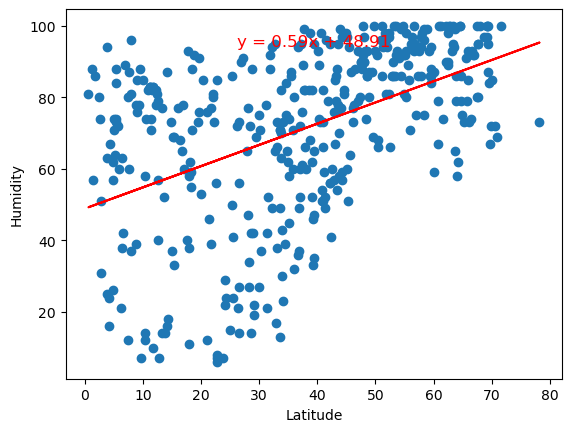

In [39]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.02581873960349083


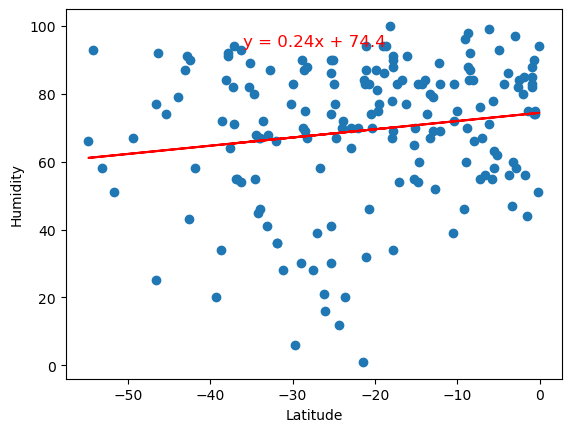

In [37]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06478013551060799


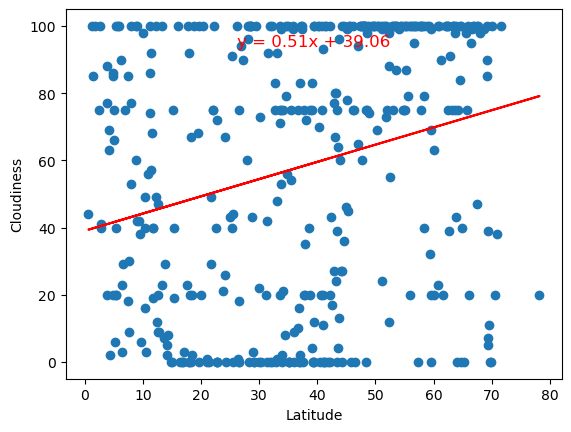

In [19]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.03758393594132181


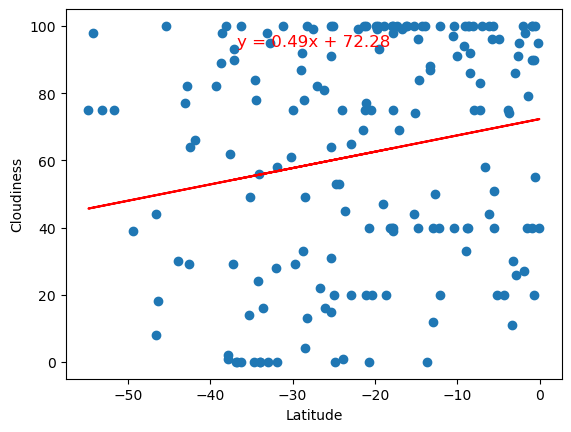

In [20]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.028016403117682234


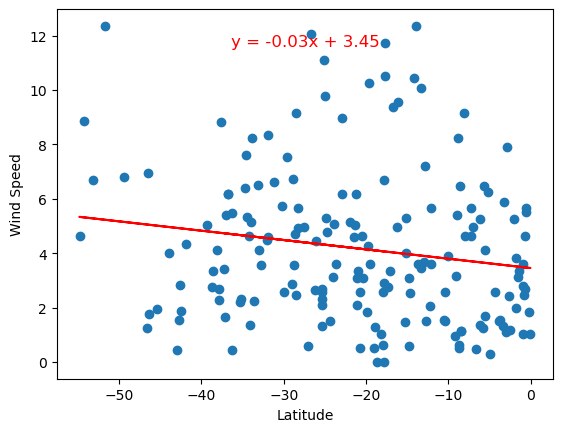

In [56]:
# Northern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: 0.028016403117682234


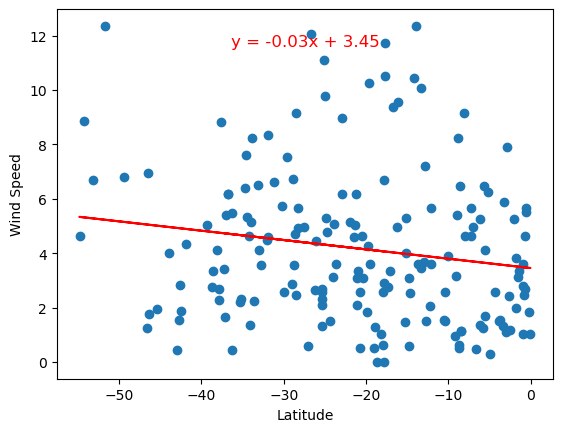

In [57]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE